In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
app = pd.read_csv('googleplaystore.csv')

In [3]:
users = pd.read_csv('googleplaystore_user_reviews.csv')

In [4]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
app.shape

(10841, 13)

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
app.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
app.duplicated().sum()

483

In [9]:
app.drop_duplicates(inplace=True)

In [10]:
app["Rating"].describe()

count    8893.000000
mean        4.189542
std         0.545452
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [11]:
app['Rating'] = app.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))

In [12]:
app = app.dropna()

In [13]:
app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
users.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [15]:
users.shape

(64295, 5)

In [16]:
users.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [17]:
users = users.drop_duplicates()


In [18]:
users = users.dropna(subset=['Translated_Review'])

In [19]:
users["Sentiment"].value_counts()

Sentiment
Positive    19015
Negative     6321
Neutral      4356
Name: count, dtype: int64

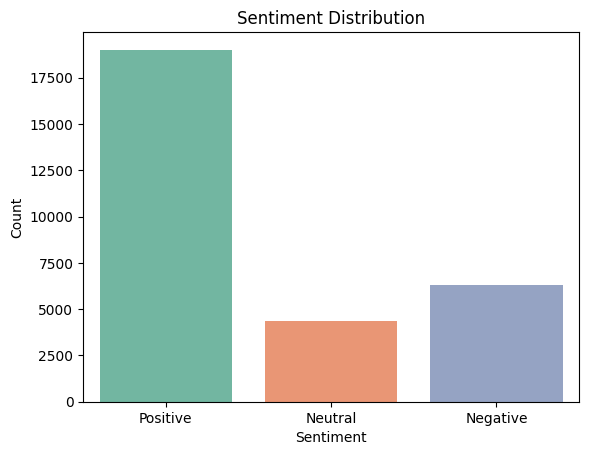

In [20]:
sns.countplot(data=users, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

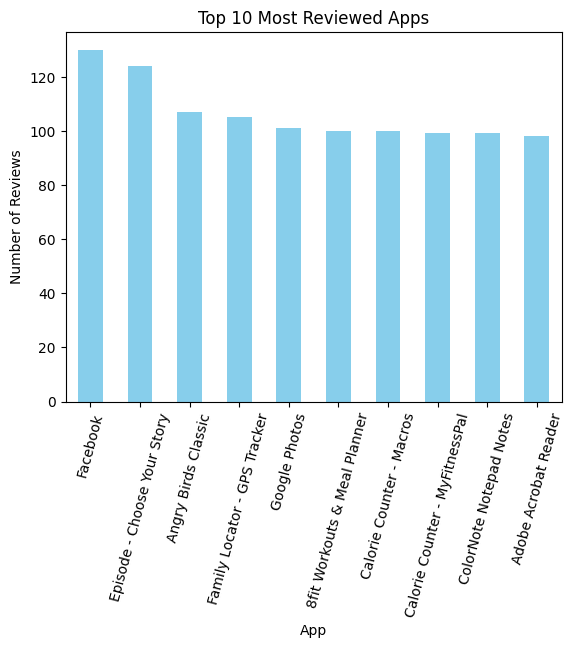

In [21]:
users['App'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Reviewed Apps')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=75)
plt.show()

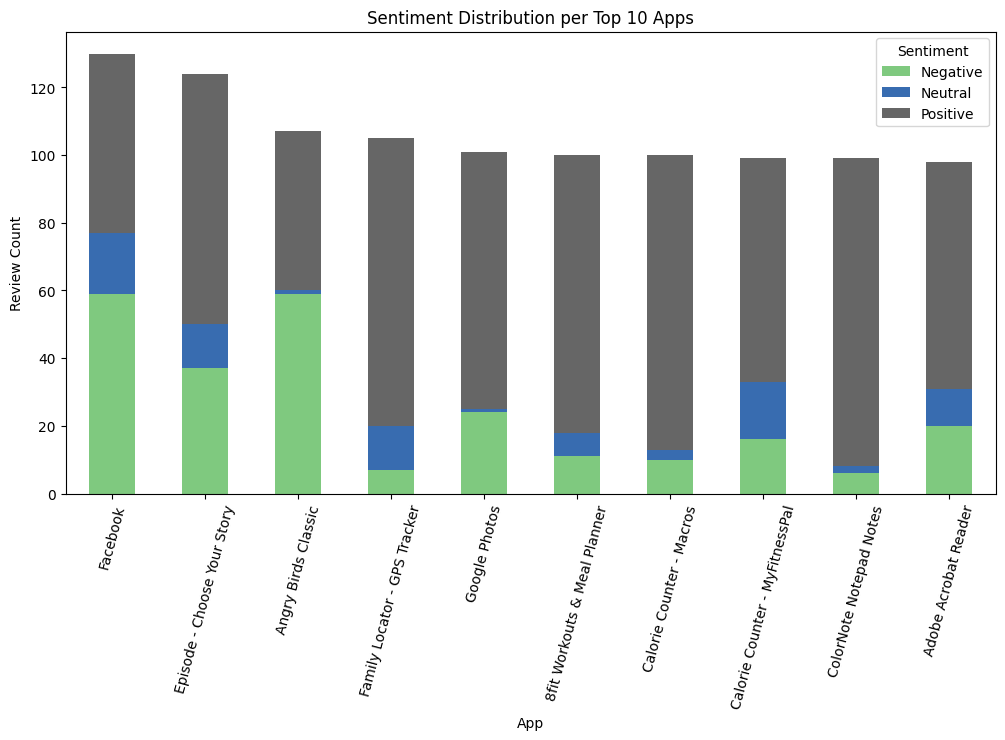

In [22]:
app_sentiment = users.groupby(['App', 'Sentiment']).size().unstack().fillna(0)
top_apps = users['App'].value_counts().head(10).index
app_sentiment.loc[top_apps].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Sentiment Distribution per Top 10 Apps')
plt.ylabel('Review Count')
plt.xticks(rotation=75)
plt.show()

In [23]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ESHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
def clean_text(text):
    text = str(text).lower()  
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)  
    text = re.sub("\\s+", " ", text).strip()


    return text

In [25]:
users['Clean_Review'] = users['Translated_Review'].apply(clean_text)


In [26]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

users['Clean_Review'] = users['Clean_Review'].apply(remove_stopwords)


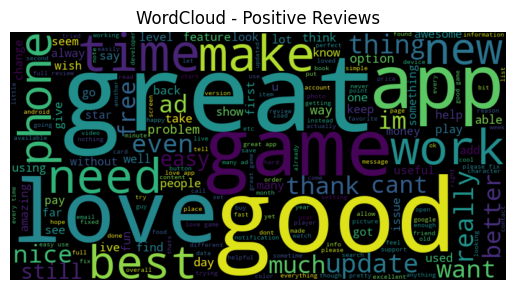

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_reviews = " ".join(users[users['Sentiment'] == 'Positive']['Clean_Review'])
wordcloud_pos = WordCloud(width=800, height=400).generate(positive_reviews)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positive Reviews')
plt.show()


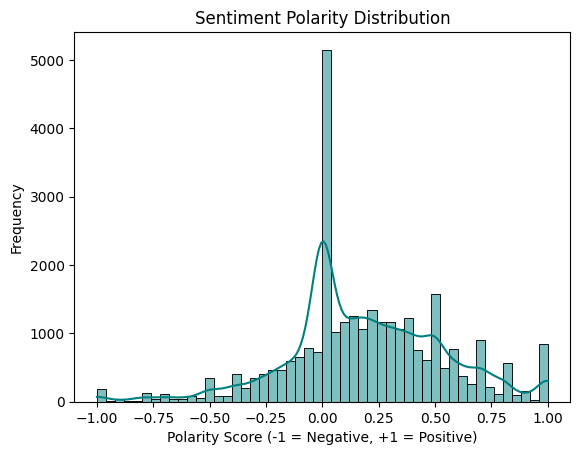

In [28]:
sns.histplot(users['Sentiment_Polarity'], bins=50, kde=True, color='teal')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity Score (-1 = Negative, +1 = Positive)')
plt.ylabel('Frequency')
plt.show()

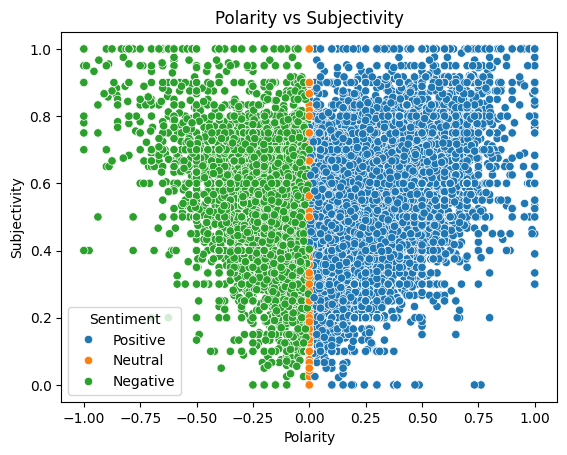

In [29]:
sns.scatterplot(data=users, x='Sentiment_Polarity', y='Sentiment_Subjectivity', hue='Sentiment')
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [30]:
print(" Most Positive Review:")
print(users.loc[users['Sentiment_Polarity'].idxmax(), ['App', 'Translated_Review']])

print("\n Most Negative Review:")
print(users.loc[users['Sentiment_Polarity'].idxmin(), ['App', 'Translated_Review']])

 Most Positive Review:
App                                              10 Best Foods for You
Translated_Review    I like eat delicious food. That's I'm cooking ...
Name: 0, dtype: object

 Most Negative Review:
App                                      11st
Translated_Review    Horrible ID verification
Name: 240, dtype: object


In [31]:
users = users[users['Sentiment'] != 'Neutral']

In [32]:
users['Sentiment_Label'] = users['Sentiment'].map({'Positive': 1, 'Negative': 0})

In [33]:
X = users['Clean_Review']           
y = users['Sentiment_Label']   



In [34]:
combined_df = pd.merge(users, app, on='App', how='inner')

In [35]:
combined_df.shape
combined_df.columns
combined_df.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Clean_Review,Sentiment_Label,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,like eat delicious food thats im cooking food ...,1,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,help eating healthy exercise regular basis,1,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


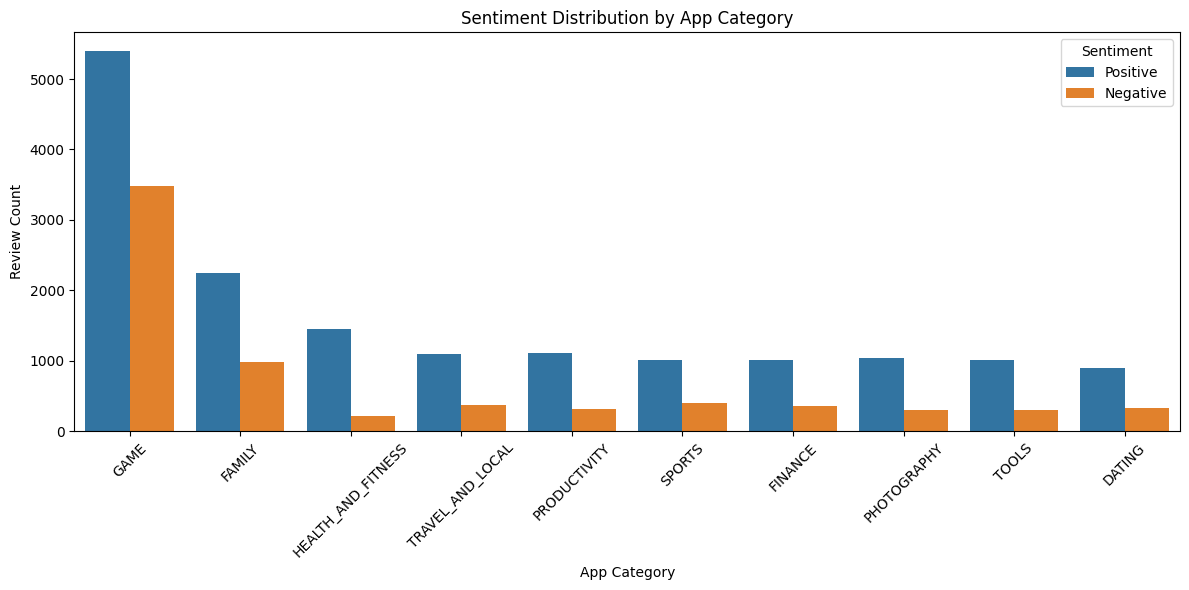

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data=combined_df, x='Category', hue='Sentiment', order=combined_df['Category'].value_counts().index[:10])
plt.title('Sentiment Distribution by App Category')
plt.xticks(rotation=45)
plt.xlabel('App Category')
plt.ylabel('Review Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


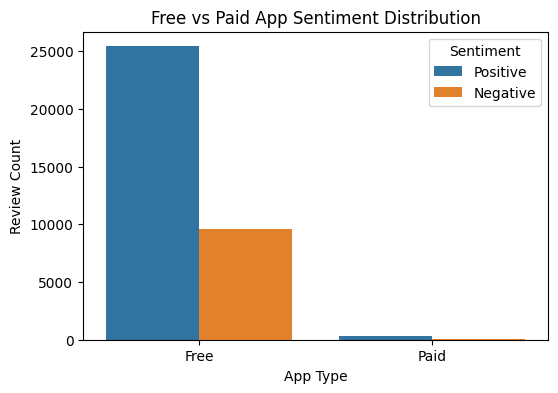

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=combined_df, x='Type', hue='Sentiment')
plt.title('Free vs Paid App Sentiment Distribution')
plt.xlabel('App Type')
plt.ylabel('Review Count')
plt.legend(title='Sentiment')
plt.show()

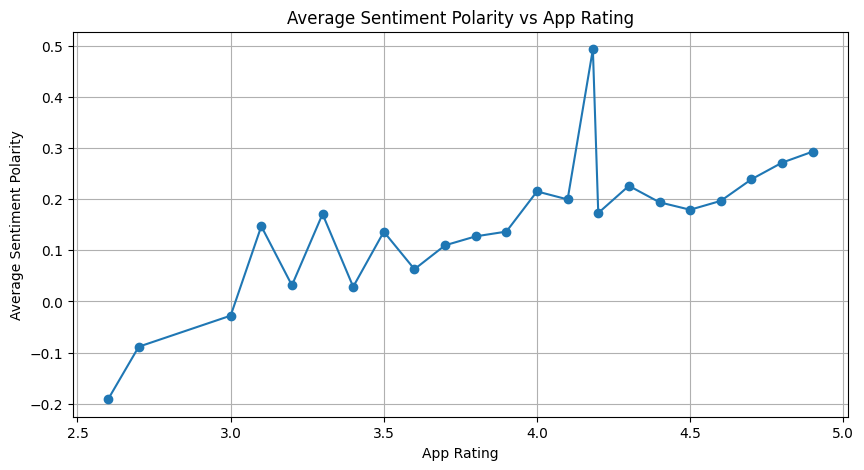

In [38]:
avg_sentiment_rating = combined_df.groupby('Rating')['Sentiment_Polarity'].mean()

plt.figure(figsize=(10,5))
avg_sentiment_rating.plot(kind='line', marker='o')
plt.title('Average Sentiment Polarity vs App Rating')
plt.xlabel('App Rating')
plt.ylabel('Average Sentiment Polarity')
plt.grid(True)
plt.show()

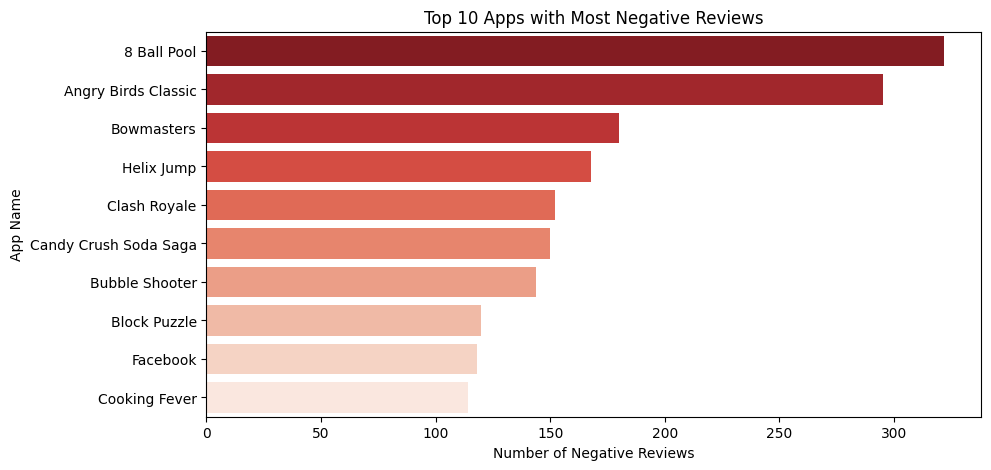

In [39]:
neg_apps = combined_df[combined_df['Sentiment'] == 'Negative']['App'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=neg_apps.values, y=neg_apps.index, palette='Reds_r')
plt.title('Top 10 Apps with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('App Name')
plt.show()

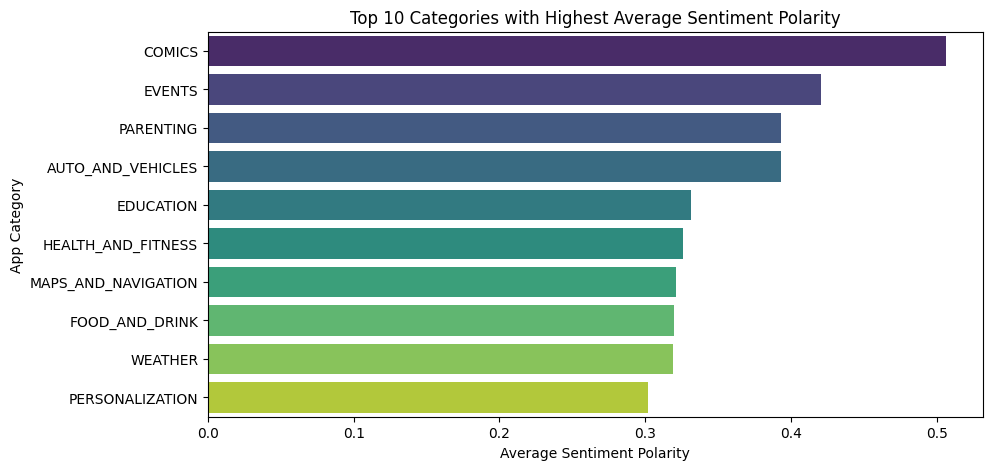

In [40]:
category_sentiment = combined_df.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette='viridis')
plt.title('Top 10 Categories with Highest Average Sentiment Polarity')
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('App Category')
plt.show()

In [41]:
combined_df['Installs'] = combined_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)
combined_df['Price'] = combined_df['Price'].str.replace('$', '', regex=False).astype(float)
combined_df['Reviews'] = combined_df['Reviews'].astype(int)
combined_df['Type'] = combined_df['Type'].map({'Free': 0, 'Paid': 1})
combined_df['Rating'] = combined_df['Rating'].fillna(combined_df['Rating'].mean())

In [42]:
def clean_size(size_str):
    if isinstance(size_str, str):
        size_str = size_str.replace(',', '').replace('+', '').strip()
        if 'M' in size_str:
            return float(size_str.replace('M', '')) * 1_000_000
        elif 'k' in size_str or 'K' in size_str:
            return float(size_str.lower().replace('k', '')) * 1_000
        elif size_str == 'Varies with device':
            return np.nan
    try:
        return float(size_str)
    except:
        return np.nan

def clean_installs(value):
    if isinstance(value, str):
        return value.replace('+', '').replace(',', '').strip()
    return value

def clean_price(value):
    if isinstance(value, str):
        return value.replace('$', '')
    return value


combined_df['Size'] = combined_df['Size'].apply(clean_size)
combined_df['Installs'] = combined_df['Installs'].apply(clean_installs).astype(float)
combined_df['Price'] = combined_df['Price'].apply(clean_price).astype(float)


combined_df = combined_df.dropna()

In [43]:
combined_df = pd.get_dummies(combined_df, columns=['Category'], drop_first=True)


In [44]:
text_features = combined_df['Clean_Review']
numeric_features = combined_df[['Rating', 'Reviews', 'Installs', 'Price', 'Type'] +
                               [col for col in combined_df.columns if 'Category_' in col]]

labels = combined_df['Sentiment_Label']


In [45]:
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [46]:
X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    text_features, 
    numeric_features, 
    labels, 
    test_size=0.2, 
    random_state=42
)


In [47]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=159587)

X_text_train_tfidf = tfidf.fit_transform(X_text_train)
X_text_test_tfidf = tfidf.transform(X_text_test)

In [48]:
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [49]:
X_num_train = np.array(X_num_train, dtype='float32')
X_num_test = np.array(X_num_test, dtype='float32')


In [50]:
X_train_final = hstack(
    [X_text_train_tfidf, csr_matrix(X_num_train)], 
    format='csr'
)
X_test_final = hstack(
    [X_text_test_tfidf, csr_matrix(X_num_test)], 
    format='csr'
)

In [51]:
model = LGBMClassifier(
    objective='binary',  
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,       
    learning_rate=0.1,
    n_estimators=500,   
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,      
    reg_lambda=0.1,     
    random_state=42,
    n_jobs=-1,         
    verbose=-1          #
)
print("Starting training...")
model.fit(
    X_train_final, 
    y_train,
    eval_set=[(X_test_final, y_test)],
    eval_metric='binary_logloss', 
    callbacks=[
        early_stopping(stopping_rounds=30, verbose=True),
        log_evaluation(period=50)
    ]
)
print("Training completed!")

Starting training...
Training until validation scores don't improve for 30 rounds
[50]	valid_0's binary_logloss: 0.2492
[100]	valid_0's binary_logloss: 0.19208
[150]	valid_0's binary_logloss: 0.1689
[200]	valid_0's binary_logloss: 0.156442
[250]	valid_0's binary_logloss: 0.149452
[300]	valid_0's binary_logloss: 0.144988
[350]	valid_0's binary_logloss: 0.143
[400]	valid_0's binary_logloss: 0.141467
[450]	valid_0's binary_logloss: 0.140559
Early stopping, best iteration is:
[449]	valid_0's binary_logloss: 0.140553
Training completed!


In [52]:
joblib.dump(model, 'lightgbm_model.joblib')

['lightgbm_model.joblib']

In [53]:
y_pred = model.predict(X_test_final)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9553168635875403

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1288
           1       0.96      0.97      0.97      3367

    accuracy                           0.96      4655
   macro avg       0.95      0.94      0.94      4655
weighted avg       0.96      0.96      0.96      4655



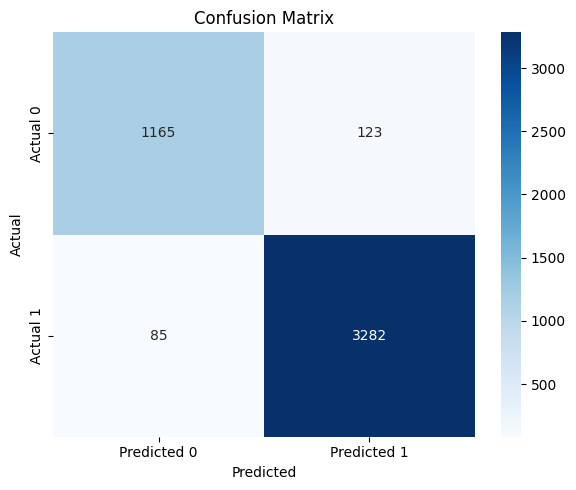

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_final)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


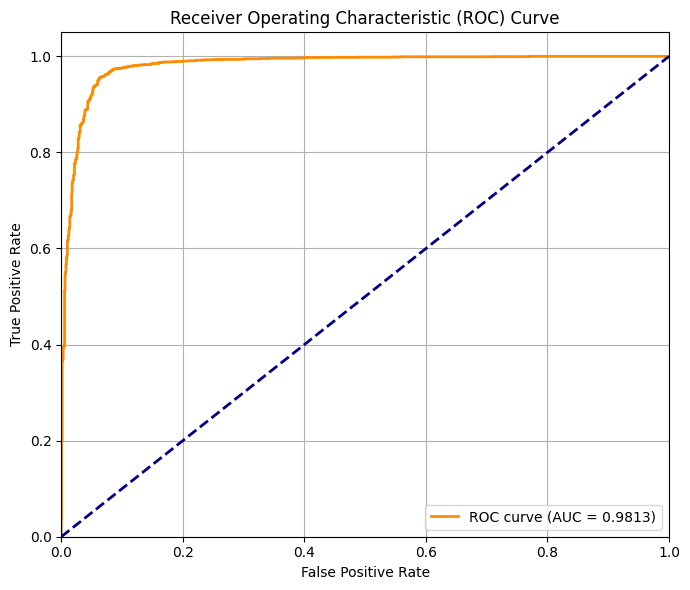

In [55]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test_final)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
